# Обучение с учителем. Нейронные сети

## Импорты

In [4]:

import tensorflow as tf
import datetime
import subprocess
import webbrowser
import time

import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
from tensorflow.keras.callbacks import TensorBoard
from IPython.display import display, IFrame
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from ultralytics import YOLO


from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Теория

**Обучение с учителем** предполагает наличие полного набора размеченных данных для тренировки модели на всех этапах ее построения. Наличие полностью размеченного датасета означает, что каждому примеру в обучающем наборе соответствует ответ, который алгоритм и должен получить. В задачах классификации алгоритм предсказывает дискретные значения, соответствующие номерам классов, к которым принадлежат объекты.

## Цель работы

Исследование принципов разработки нейронной сети на примере задачи классификации изображений.

## Постановка задачи I часть

Реализовать классификацию черно-белых изображений рукописных цифр (28x28) по 10 категориям (от 0 до 9). Для работы будет использоваться датасет MNIST, который содержит 60,000 изображений для обучения и 10,000 изображений для тестирования.

1. Исследовать нейронную сеть при заданных начальных параметрах (см. приложенный файл). Оцените точность прогноза, даваемого вашей моделью. С помощью TensorBoard - Scalars Dashboard и Graphs Dashboard (концептуальный граф, выберите тег «keras»), зафиксируйте в отчете графики изменения точности и потерь, а также концептуальный граф исходной модели.
2. Создайте и обучите, фиксируя точность, ещё не менее трех моделей нейронной сети: с иным количеством слоёв, нейронов в них и функциями активации; с различным количеством эпох обучения; с иным методом оптимизации. Оцените точность прогнозов, выдаваемых моделями, сделайте выводы.
3. Найти архитектуру сети, при которой точность классификации будет не менее 99%. С помощью TensorBoard - Scalars Dashboard и Graphs Dashboard (концептуальный граф, выберите тег «keras»), зафиксируйте в отчете графики изменения точности и потерь, а также концептуальный граф улучшенной модели.

## Датасет

База данных MNIST — объёмная база данных образцов рукописного написания цифр.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Исследование нейронной сети

Создадим простую нейронную сеть для классификации изображений размером 28x28, состоящую из двух полносвязных слоев.
Нейронная сеть типа многослойного перцептрона (MLP, multilayer perceptron), которая относится к полносвязным нейронным сетям (или fully connected networks):
![perceptrone](https://datascientest.com/en/files/2021/04/illu_perceptron_blog-138.png)

In [3]:
simple_model =  tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

simple_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Обучение модели

In [4]:
log_dir = "logs/fit/simple_model" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = simple_model.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6870 - loss: 1.1180 - val_accuracy: 0.9004 - val_loss: 0.3793
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.8958 - loss: 0.3746 - val_accuracy: 0.9146 - val_loss: 0.3116
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.9098 - loss: 0.3197 - val_accuracy: 0.9200 - val_loss: 0.2789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9193 - loss: 0.2864 - val_accuracy: 0.9269 - val_loss: 0.2600
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.9244 - loss: 0.2667 - val_accuracy: 0.9313 - val_loss: 0.2445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.9293 - loss: 0.2489 - val_accuracy: 0.9327 - val_loss: 0.2331
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 835us/step - accuracy: 0.9318 - loss: 0.2385 - val_accuracy: 0.9373 - val_loss: 0.2215
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.9371 - l

### Tenserboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [5]:
tensorboard = subprocess.Popen(['tensorboard', '--logdir', log_dir])
time.sleep(5)
webbrowser.open('http://localhost:6006')

True

### Графики из Tenserboard

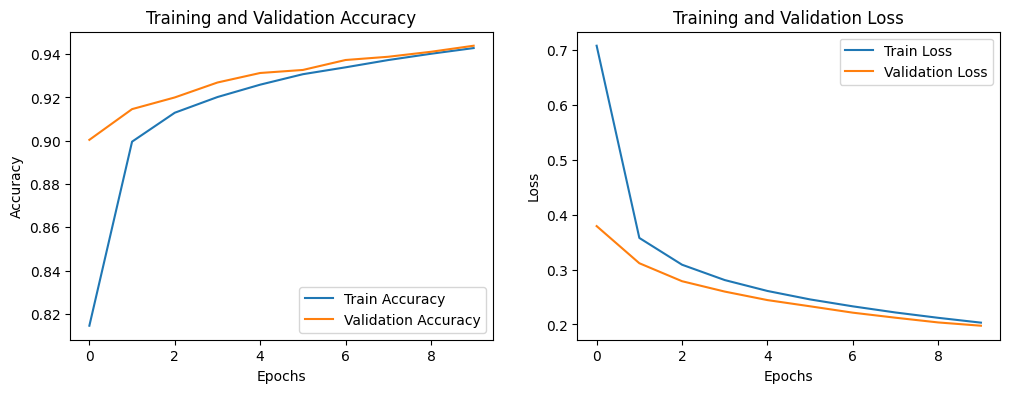

In [6]:
train_log_dir = log_dir + "/train"
train_ea = event_accumulator.EventAccumulator(train_log_dir)

val_log_dir = log_dir + "/validation"
val_ea = event_accumulator.EventAccumulator(val_log_dir)

train_ea.Reload()
val_ea.Reload()

def extract_tensor_values(event_accumulator, tag):
    events = event_accumulator.Tensors(tag)
    steps = [e.step for e in events]
    values = [tf.make_ndarray(e.tensor_proto).item() for e in events]
    return steps, values

train_accuracy_steps, train_accuracy_values = extract_tensor_values(train_ea, "epoch_accuracy")
train_loss_steps, train_loss_values = extract_tensor_values(train_ea, "epoch_loss")

val_accuracy_steps, val_accuracy_values = extract_tensor_values(val_ea, "epoch_accuracy")
val_loss_steps, val_loss_values = extract_tensor_values(val_ea, "epoch_loss")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy_steps, train_accuracy_values, label='Train Accuracy')
plt.plot(val_accuracy_steps, val_accuracy_values, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(train_loss_steps, train_loss_values, label='Train Loss')
plt.plot(val_loss_steps, val_loss_values, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.show()



### Концептуальный граф

![simple_model_graph](conceptual_graphs/simple_model.png)

На графе:
* Input Layer — определяет форму входных данных (например, 28x28 изображений).
* Flatten — преобразует 2D-данные в 1D вектор.
* Dense — первый полносвязный слой, состоящий из 32 нейронов с функцией активации ReLU.
* Dense_1 — выходной полносвязный слой с 10 нейронами (для 10 классов) и функцией активации softmax, которая дает вероятности для каждого класса.

## Перебор сетей с разными конфигурациями

Создайте и обучите, фиксируя точность, ещё не менее трех моделей нейронной сети: с иным количеством слоёв, нейронов в них и функциями активации; с различным количеством эпох обучения; с иным методом оптимизации.

In [7]:
configs = [
    {'layers': [32, 10], 'activation': ['relu', 'softmax'], 'optimizer': 'SGD', 'epochs': 5},
    {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adam', 'epochs': 10},
    {'layers': [128, 64, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'RMSprop', 'epochs': 15},
    {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adagrad', 'epochs': 20},
    {'layers': [128, 128, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'SGD', 'epochs': 10}
]

Тренировка модели с конфигурацией №0:
 {'layers': [32, 10], 'activation': ['relu', 'softmax'], 'optimizer': 'SGD', 'epochs': 5}


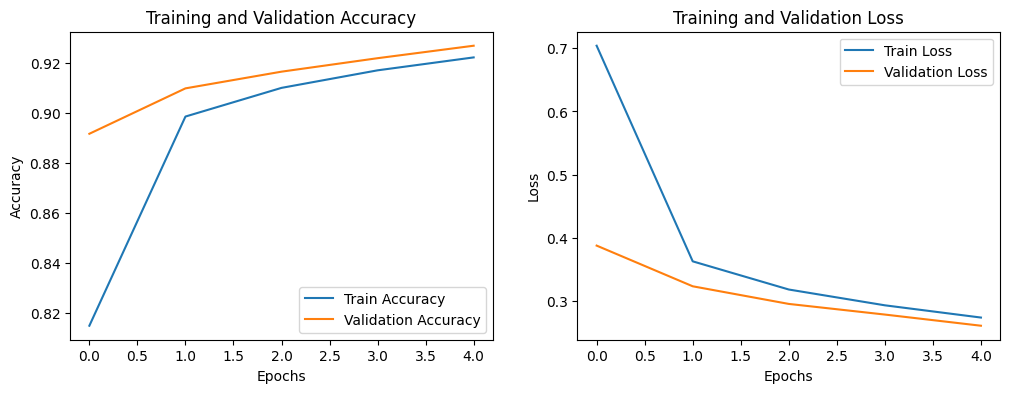

Тренировка модели с конфигурацией №1:
 {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adam', 'epochs': 10}


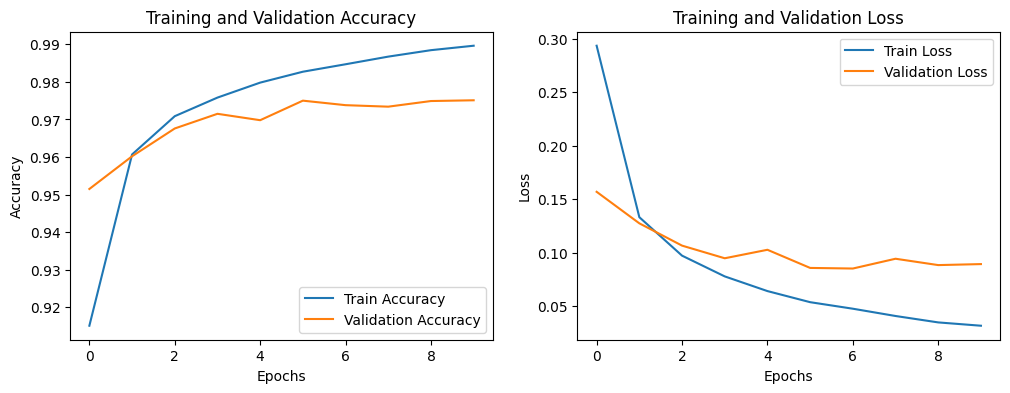

Тренировка модели с конфигурацией №2:
 {'layers': [128, 64, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'RMSprop', 'epochs': 15}


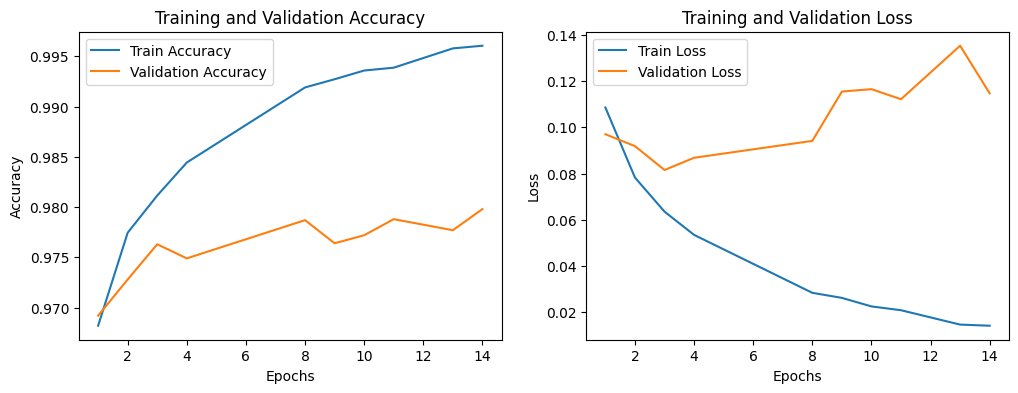

Тренировка модели с конфигурацией №3:
 {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adagrad', 'epochs': 20}


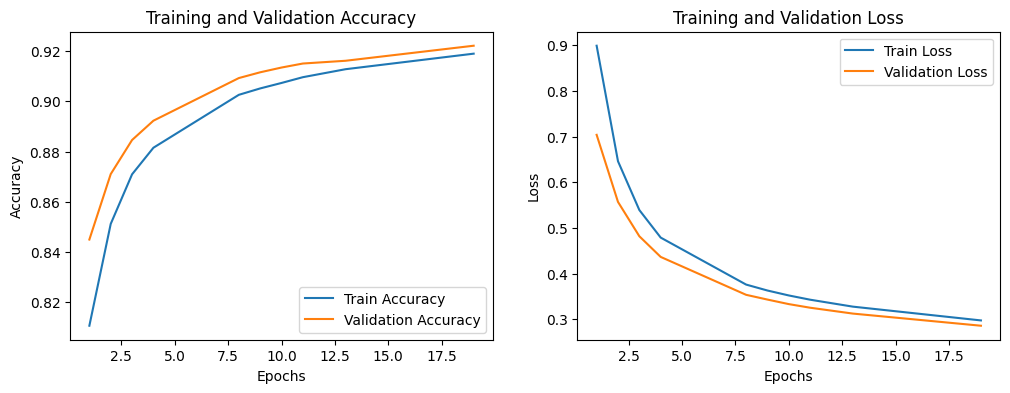

Тренировка модели с конфигурацией №4:
 {'layers': [128, 128, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'SGD', 'epochs': 10}


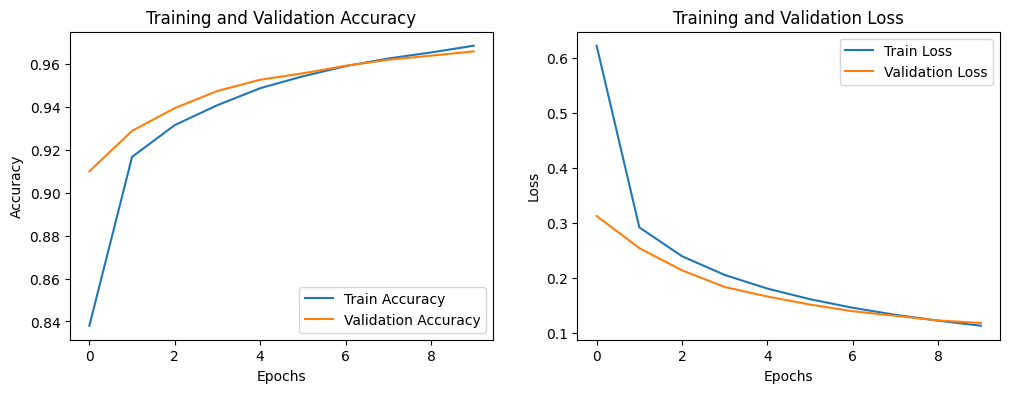

In [10]:
for i,config in enumerate(configs):
    print(f"Тренировка модели с конфигурацией №{i}:\n {config}")
    
    # Создание модели
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(28, 28)))  
    model.add(tf.keras.layers.Flatten())  
    for neurons, activation in zip(config['layers'][:-1], config['activation'][:-1]):
        model.add(tf.keras.layers.Dense(neurons, activation=activation))
    model.add(tf.keras.layers.Dense(config['layers'][-1], activation=config['activation'][-1]))  
    
    model.compile(optimizer=config['optimizer'], loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    log_dir = f"logs/fit/config_{i}_model_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    history = model.fit(x_train, y_train, epochs=config['epochs'], validation_data=(x_test, y_test), callbacks=[tensorboard_callback], verbose=0)
    
    time.sleep(5)

    train_log_dir = log_dir + "/train"
    train_ea = event_accumulator.EventAccumulator(train_log_dir)
    train_ea.Reload()

    val_log_dir = log_dir + "/validation"
    val_ea = event_accumulator.EventAccumulator(val_log_dir)
    val_ea.Reload()

    def extract_tensor_values(event_accumulator, tag):
        events = event_accumulator.Tensors(tag)
        steps = [e.step for e in events]
        values = [tf.make_ndarray(e.tensor_proto).item() for e in events]
        return steps, values

    train_accuracy_steps, train_accuracy_values = extract_tensor_values(train_ea, "epoch_accuracy")
    train_loss_steps, train_loss_values = extract_tensor_values(train_ea, "epoch_loss")

    val_accuracy_steps, val_accuracy_values = extract_tensor_values(val_ea, "epoch_accuracy")
    val_loss_steps, val_loss_values = extract_tensor_values(val_ea, "epoch_loss")

    # Построение графиков
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_accuracy_steps, train_accuracy_values, label='Train Accuracy')
    plt.plot(val_accuracy_steps, val_accuracy_values, label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"Training and Validation Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(train_loss_steps, train_loss_values, label='Train Loss')
    plt.plot(val_loss_steps, val_loss_values, label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Training and Validation Loss")

    plt.show()

    # Запуск TensorBoard
    tensorboard = subprocess.Popen(['tensorboard', '--logdir', log_dir])
    time.sleep(5)
    webbrowser.open(f'http://localhost:{6006 + i}')

### Концептуальный граифик

![simple_model_graph](conceptual_graphs/simple_model.png)

### Выводы по перебранным моделям

Мы перебирали из моделей:  
```python
configs = [
    {'layers': [32, 10], 'activation': ['relu', 'softmax'], 'optimizer': 'SGD', 'epochs': 5},
    {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adam', 'epochs': 10},
    {'layers': [128, 64, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'RMSprop', 'epochs': 15},
    {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adagrad', 'epochs': 20},
    {'layers': [128, 128, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'SGD', 'epochs': 10}
]
```  
Значения accuracy, соответствующие каждой кинфугурации:

0. 94
1. 93
2. 07
3. 98
4. 92


Какие можно сделать выводы?  

1. **Лучшая конфигурация (№3)**:
   - Конфигурация с 64, 32 и 10 нейронами в слоях, активацией `relu` и оптимизатором `Adagrad`, 20 эпох — **точность 98%**.
   - Эта модель показала наилучшие результаты, вероятно, из-за адаптивной скорости обучения в `Adagrad`.

2. **Роль структуры модели**:
   - Увеличение количества нейронов и слоев не всегда улучшает результаты. Например, конфигурация с 128 нейронами (№2 и №4) показала худшие результаты, что может свидетельствовать о переобучении.

3. **Активация**:
   - `ReLU` на скрытых слоях эффективно работает в большинстве конфигураций, а `softmax` на выходном слое — стандарт для многоклассовой классификации.

4. **Оптимизатор**:
   - `Adagrad` (в конфигурации №3) оказался наиболее эффективным, превосходя другие оптимизаторы (SGD, Adam, RMSprop).

5. **Эпохи**:
   - Увеличение числа эпох не всегда улучшает точность. Например, конфигурация с 5 эпохами (№0) имеет точность 94%, а с 20 эпохами (№4) — только 92%.


## Сеть с точностью свыше 99%

In [25]:
configs = [
    {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adagrad', 'epochs': 20},
    {'layers': [128, 64, 32, 10], 'activation': ['relu', 'relu', 'relu', 'softmax'], 'optimizer': 'Adam', 'epochs': 25},
    {'layers': [256, 128, 64, 10], 'activation': ['relu', 'relu', 'relu', 'softmax'], 'optimizer': 'RMSprop', 'epochs': 30},
    {'layers': [512, 256, 128, 64, 10], 'activation': ['relu', 'relu', 'relu', 'relu', 'softmax'], 'optimizer': 'Nadam', 'epochs': 30}
]


Тренировка модели с конфигурацией №0:
 {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adagrad', 'epochs': 20}


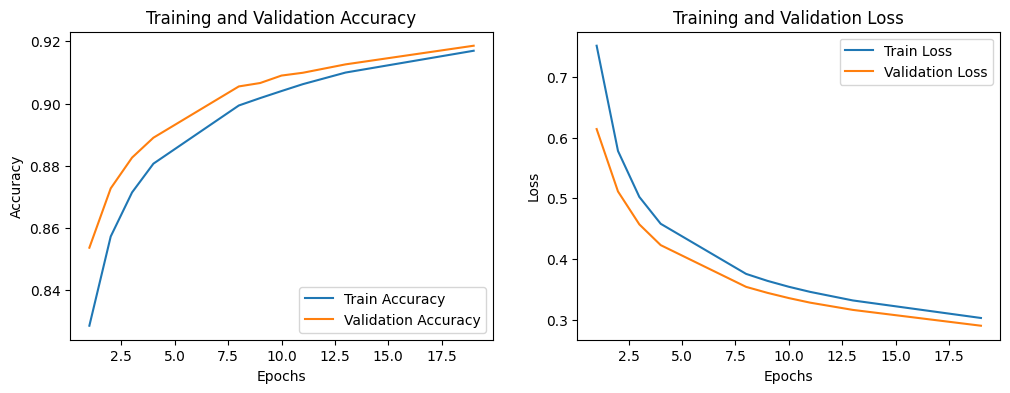

Тренировка модели с конфигурацией №1:
 {'layers': [128, 64, 32, 10], 'activation': ['relu', 'relu', 'relu', 'softmax'], 'optimizer': 'Adam', 'epochs': 25}


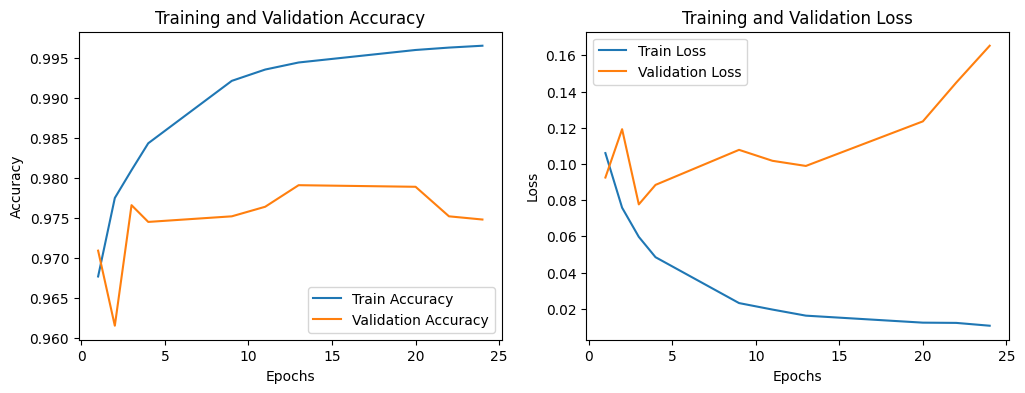

Тренировка модели с конфигурацией №2:
 {'layers': [256, 128, 64, 10], 'activation': ['relu', 'relu', 'relu', 'softmax'], 'optimizer': 'RMSprop', 'epochs': 30}


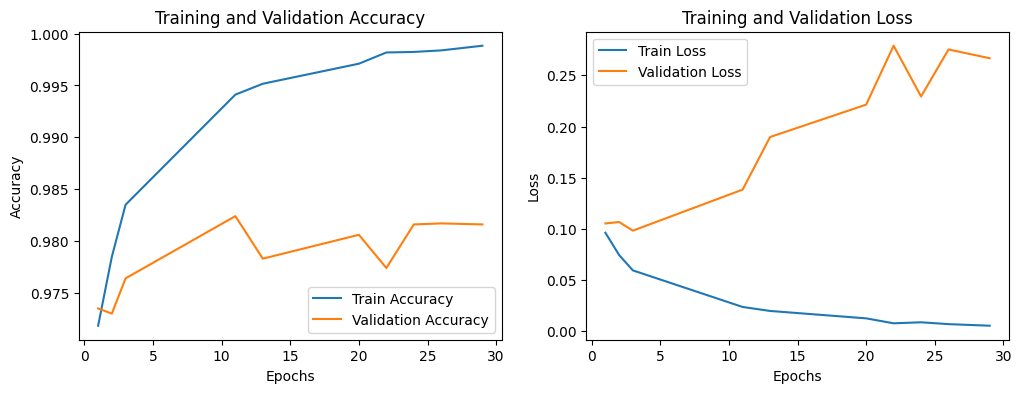

Тренировка модели с конфигурацией №3:
 {'layers': [512, 256, 128, 64, 10], 'activation': ['relu', 'relu', 'relu', 'relu', 'softmax'], 'optimizer': 'Nadam', 'epochs': 30}


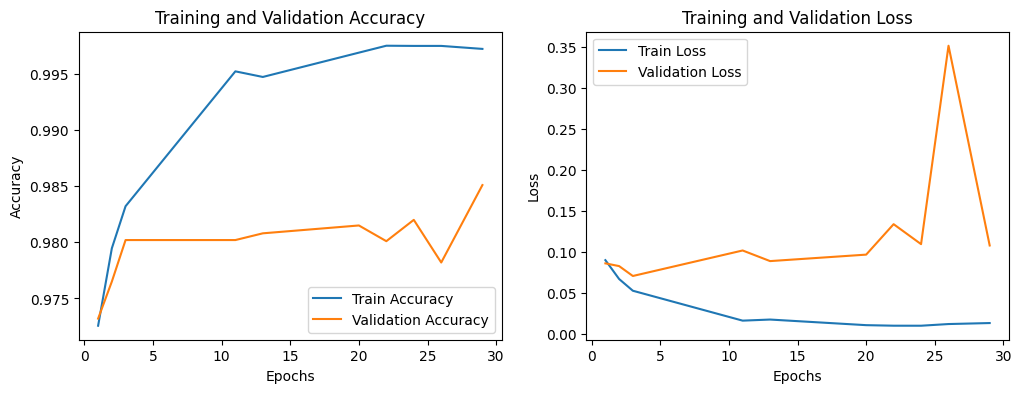

In [26]:
for i,config in enumerate(configs):
    print(f"Тренировка модели с конфигурацией №{i}:\n {config}")
    
    # Создание модели
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(28, 28)))  
    model.add(tf.keras.layers.Flatten())  
    for neurons, activation in zip(config['layers'][:-1], config['activation'][:-1]):
        model.add(tf.keras.layers.Dense(neurons, activation=activation))
    model.add(tf.keras.layers.Dense(config['layers'][-1], activation=config['activation'][-1]))  
    
    model.compile(optimizer=config['optimizer'], loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    log_dir = f"logs/fit/best_config_{i}_model_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    history = model.fit(x_train, y_train, epochs=config['epochs'], validation_data=(x_test, y_test), callbacks=[tensorboard_callback], verbose=0)
    
    time.sleep(5)

    train_log_dir = log_dir + "/train"
    train_ea = event_accumulator.EventAccumulator(train_log_dir)
    train_ea.Reload()

    val_log_dir = log_dir + "/validation"
    val_ea = event_accumulator.EventAccumulator(val_log_dir)
    val_ea.Reload()

    def extract_tensor_values(event_accumulator, tag):
        events = event_accumulator.Tensors(tag)
        steps = [e.step for e in events]
        values = [tf.make_ndarray(e.tensor_proto).item() for e in events]
        return steps, values

    train_accuracy_steps, train_accuracy_values = extract_tensor_values(train_ea, "epoch_accuracy")
    train_loss_steps, train_loss_values = extract_tensor_values(train_ea, "epoch_loss")

    val_accuracy_steps, val_accuracy_values = extract_tensor_values(val_ea, "epoch_accuracy")
    val_loss_steps, val_loss_values = extract_tensor_values(val_ea, "epoch_loss")

    # Построение графиков
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_accuracy_steps, train_accuracy_values, label='Train Accuracy')
    plt.plot(val_accuracy_steps, val_accuracy_values, label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"Training and Validation Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(train_loss_steps, train_loss_values, label='Train Loss')
    plt.plot(val_loss_steps, val_loss_values, label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Training and Validation Loss")

    plt.show()

    # Запуск TensorBoard
    tensorboard = subprocess.Popen(['tensorboard', '--logdir', log_dir])
    time.sleep(5)
    webbrowser.open(f'http://localhost:{6006 + i}')

Accuracy:
0. 94%
1. 93%
2. 97%
3. 98%

## Постановка задачи II часть

1. Выбрать и загрузить датасет на свое усмотрение (датасеты не должны повторяться внутри группы). Описать датасет. Провести необходимые изменения (предобработка данных) для дальнейшей работы. Разбить выборку на обучающую и тестовую.
2. Провести классификацию на данных двумя из пяти предложенных методов: наивный байесовский метод, классифицирующие деревья, линейный дискриминантный анализ, метод опорных векторов, метод k-ближайших соседей. Для каждого метода провести классификацию и оценить ее с помощью таких метрик как точность (precision), полнота (recall), F1-мера (F1-score), площадь ROC-кривой (AUC-ROC curve). Использовать matplotlib для построения ROC-кривой и отображения AUC.
3. Поменять параметры методов и сделать выводы:
    * Для наивного байесовского метода: провести классификацию, используя GaussianNB, MultinomialNB, ComplementNB, BernoulliNB. Описать различия методов. 
    * Для классифицирующего дерева: исследовать работу классифицирующего дерева при различных параметрах criterion, splitter, max_depth, min_samples_split, min_samples_leaf. Выводить изображение полученных деревьев.
    * Для линейного дискриминантного анализа: исследовать работу классификатора при различных параметрах solver, shrinkage. Применить функцию tranform и визуализировать полученные результаты.
    * Для метода опорных векторов: исследуйте работу метода при различных значениях kernel, degree, max_iter. Провести исследование для методов NuSVC и LinearSVC, SVC и выявить отличия.
    * Для метода k-средних: исследовать работу метода при различных значениях n_neighbors. Реализовать метод «локтя», чтобы выбрать оптимальное значение n_neighbors для алгоритма k-ближайших соседей, визуализировать полученные результаты. Выбрать подходящее значение и провести классификацию.

## Датасет

### Описание данных

In [5]:
data = pd.read_csv('heart.csv')
X = data.drop(columns=['target'])
y = data['target']
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   target    303 non-null    int64
dtypes: int64(10)
memory usage: 23.8 KB


(None,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  target
 0   63    1   3       145   233    1        0      150      0       1
 1   37    1   2       130   250    0        1      187      0       1
 2   41    0   1       130   204    0        0      172      0       1
 3   56    1   1       120   236    0        1      178      0       1
 4   57    0   0       120   354    0        1      163      1       1)

In [6]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

* **age** — возраст пациента
* **sex** — пол пациента (1 = мужчина, 0 = женщина)
* **cp** — тип боли в груди (1 = типичная стенокардия, 2 = атипичная стенокардия, 3 = другой вид боли, 4 = нет боли)
* **trestbps** — артериальное давление в состоянии покоя (мм ртутного столба, на момент госпитализации)
* **chol** — уровень холестерола (мг/дл)
* **fbs** — уровень сахара крови натощак выше 120 мг/дл (1 = да, 0 = нет)
* **restecg** — результат ЭКГ в состоянии покоя (0 = нормальный, 1 = абнормальный, 2 = признаки гипертрофии желудочка)
* **thalach** — максимальная зафиксированная частота сердцебиения
* **exang** — стенокардия в результате физической нагружки (1 = да, 0 = нет)
* **target** — наличие сердечно-сосудистого заболевания (1 = да, 0 = нет)

### Стандартизация

Стандартизация — это процесс приведения числовых признаков (фичей) к единому масштабу. Обычно это делается так, чтобы все переменные имели среднее значение 0 и стандартное отклонение 1. Это достигается путем вычисления z-оценки для каждого значения:  
$$
z = \frac{x - \mu}{\sigma}
$$
Где:
* $x$ — текущее значение признака,
* $\mu$ — среднее значение признака,
* $\sigma$ — стандартное отклонение признака.

In [7]:
for column in X.columns:
    print(column)
    print(f"Count of uniqeu: {len(X[column].unique())}\nValues: {X[column].unique()}")
    print(f'Min = {X[column].min()} Max = {X[column].max()}')
    print('-' * 50)

age
Count of uniqeu: 41
Values: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
Min = 29 Max = 77
--------------------------------------------------
sex
Count of uniqeu: 2
Values: [1 0]
Min = 0 Max = 1
--------------------------------------------------
cp
Count of uniqeu: 4
Values: [3 2 1 0]
Min = 0 Max = 3
--------------------------------------------------
trestbps
Count of uniqeu: 49
Values: [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
Min = 94 Max = 200
--------------------------------------------------
chol
Count of uniqeu: 152
Values: [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 1

Мы будем выполнять стандартизацию между числовыми переменными:  
* age (возраст): числовая переменная с возможным диапазоном от 20 до 80 лет
* trestbps (артериальное давление): числовая переменная, диапазон может быть от 90 до 200
* chol (уровень холестерина): числовая переменная, диапазон от 100 до 400
* thalach (максимальный пульс): числовая переменная, диапазон от 70 до 200  

sex, cp, fbs, restecg, exang — это категориальные или бинарные переменные, поэтому стандартизация им не нужна  

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ['age', 'trestbps', 'chol', 'thalach']
X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X_scaled[numeric_features])

X_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1


In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Задача классификации

Для определения моделей запишем основные характеристики датасета:  
* Размер датасета: 303 объекта, 10 признаков
* Цель классификации: Предсказание бинарного целевого признака (класс 0 или 1).
* Структура классов: Целевая переменная сбалансирована (165 объектов класса 1 и 138 объектов класса 0).
* Качество данных: Данные качественные без пропусков.

Подходящие модели:  

* Решающее дерево  
Средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки».  

* Метод опорных векторов (SVM)  
эффективен для бинарной классификации и хорошо работает с высокоразмерными данными, особенно в случае, если данные разделимы с помощью сложной границы. Метод также хорошо подходит для задач, связанных с классификацией медицинских данных.



### Решающее дерево

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 5, 7, 10, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

dt = DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train_scaled, y_train)

dt_pred_scaled = grid_dt.predict(X_test_scaled)

print('Decision Tree best params:')
print(grid_dt.best_params_)

print(classification_report(y_test, dt_pred_scaled))


Decision Tree best params:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        41
           1       0.80      0.80      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



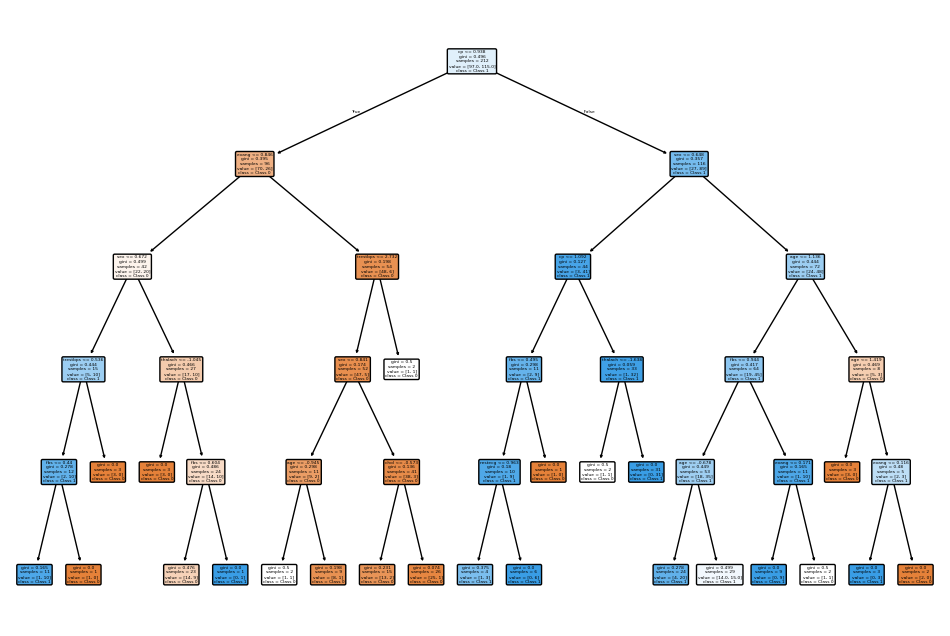

In [21]:
best_tree = grid_dt.best_estimator_

plt.figure(figsize=(12, 8))
plot_tree(best_tree, filled=True, feature_names=X_train_scaled.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.show()

##### Выводы

##### Лучшие параметры
* criterion: 'gini' — выбран для оценки чистоты узлов.
* max_depth: 5 — ограничивает глубину дерева, что помогает избежать переобучения.
* min_samples_leaf: 1 — позволяет дереву создавать листы с минимальным количеством примеров.
* min_samples_split: 5 — минимальное количество примеров для разбиения узла.
* splitter: 'random' — случайное разбиение узлов, что может улучшить обобщающую способность.

##### Результаты
* Точность: 78% — хорошая, но не идеальная производительность.
* Precision и Recall: Баланс между точностью и полнотой для обоих классов. Класс 1 немного лучше, но разница незначительная.

Модель с этими параметрами достаточно хорошо справляется с задачей, но есть возможности для улучшения, например, путем дальнейшего тонкого подбора гиперпараметров или использования других моделей.

### Метод опорных векторов

#### SVC

In [36]:
param_grid_svc = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [3, 4, 5],
    'max_iter': [500, 1000, 10000]
}

svc = SVC(random_state=42)

grid_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train_scaled, y_train)

svc_pred_scaled = grid_svc.predict(X_test_scaled)

print('Support vector method best params:')
print(grid_svc.best_params_)
print(classification_report(y_test, svc_pred_scaled))

Support vector method best params:
{'degree': 3, 'kernel': 'linear', 'max_iter': 1000}
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.81      0.88      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


#### LinearSVC

In [29]:
from sklearn.svm import LinearSVC

param_grid_linear_svc = {
    'C': [0.1, 1, 10], 
    'max_iter': [1000, 5000, 10000]
}

linear_svc = LinearSVC(random_state=42)

grid_linear_svc = GridSearchCV(estimator=linear_svc, param_grid=param_grid_linear_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_linear_svc.fit(X_train_scaled, y_train)

linear_svc_pred_scaled = grid_linear_svc.predict(X_test_scaled)

print('Linear SVC best params:')
print(grid_linear_svc.best_params_)
print(classification_report(y_test, linear_svc_pred_scaled))

Linear SVC best params:
{'C': 0.1, 'max_iter': 1000}
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        41
           1       0.80      0.82      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



#### NuSVC

In [ ]:
from sklearn.svm import NuSVC

param_grid_nu_svc = {
    'nu': [0.1, 0.5, 0.9],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [3, 4, 5],  
    'max_iter': [1000, 5000, -1]
}

nu_svc = NuSVC(random_state=42)

grid_nu_svc = GridSearchCV(estimator=nu_svc, param_grid=param_grid_nu_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_nu_svc.fit(X_train_scaled, y_train)

nu_svc_pred_scaled = grid_nu_svc.predict(X_test_scaled)

print('NuSVC best params:')
print(grid_nu_svc.best_params_)
print(classification_report(y_test, nu_svc_pred_scaled))

NuSVC best params:
{'kernel': 'linear', 'nu': 0.5}
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.80      0.88      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



#### Выводы

##### Лучшие параметры
* Kernel: 'linear' — линейное ядро показало наилучший результат.
* Degree: 3 — не имеет значительного влияния, так как для линейного ядра этот параметр не используется.
* Max_iter: 1000 — модель завершила обучение после 1000 итераций.

##### Результаты
* Точность (Accuracy): 0.82 — 82% правильных предсказаний.
* Precision: 0.84 для класса 0, 0.81 для класса 1.
* Recall: 0.76 для класса 0, 0.88 для класса 1.
* F1-Score: 0.79 для класса 0, 0.85 для класса 1.

Модель с линейным ядром показала хорошие результаты, особенно для класса 1. Предупреждение о сходимости говорит о том, что стоит применить нормализацию данных для улучшения работы модели.

## Постановка задачи III часть

1. Решить задачу распознавания предметов (от двух до восьми классов). Разметить изображения вручную или использовать размеченный датасет с сайта (датасеты внутри группы не должны повторяться).
2. Запустить процесс обучения модели нейронной на размеченном датасете. Примеры моделей и кода для обучения представлены на сайте.
3. Зайти в папку /runs/detect/yolov11n_custom. Описать каждый из полученных графиков.
4. Проверить работу обученной нейронной сети путем запуска разработанной программы для детекции объектов на изображении или видеопотоке. Допускается как написание собственной программы для детекции объектов с помощью обученной нейронной сети, так и использование готового проекта.

In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("joseph-nelson").project("rock-paper-scissors")
version = project.version(1)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rock-Paper-Scissors-1 in folder:: 100%|██████████| 2927/2927 [00:01<00:00, 2753.74it/s]


In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11n-cls.pt')

results = model.train(data='Rock-Paper-Scissors-1', epochs=20, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.32 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.29  Python-3.12.6 torch-2.5.1+cpu CPU (AMD Ryzen 7 5700X 8-Core Processor)
engine\trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=Rock-Paper-Scissors-1, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

train: Scanning E:\Programming\DataScienceStudy\NSTU\AIandML\lab3\Rock-Paper-Scissors-1\train... 2520 images, 0 corrupt: 100%|██████████| 2520/2520 [00:01<00:00, 2242.12it/s]


train: New cache created: E:\Programming\DataScienceStudy\NSTU\AIandML\lab3\Rock-Paper-Scissors-1\train.cache


val: Scanning E:\Programming\DataScienceStudy\NSTU\AIandML\lab3\Rock-Paper-Scissors-1\test... 33 images, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 1668.34it/s]

val: New cache created: E:\Programming\DataScienceStudy\NSTU\AIandML\lab3\Rock-Paper-Scissors-1\test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)


TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\classify\train6
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all      0.909          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all      0.879          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20         0G    0.03628          8        640: 100%|██████████| 158/158 [04:51<00:00,  1.85s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      11/20         0G    0.03441          8        640: 100%|██████████| 158/158 [04:51<00:00,  1.84s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20         0G    0.02586          8        640: 100%|██████████| 158/158 [04:51<00:00,  1.85s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20         0G    0.02067          8        640: 100%|██████████| 158/158 [04:51<00:00,  1.84s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20         0G    0.02285          8        640: 100%|██████████| 158/158 [04:51<00:00,  1.84s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20         0G    0.02137          8        640: 100%|██████████| 158/158 [04:51<00:00,  1.84s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      16/20         0G    0.02468          8        640: 100%|██████████| 158/158 [05:04<00:00,  1.93s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20         0G    0.01797          8        640: 100%|██████████| 158/158 [05:00<00:00,  1.90s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20         0G    0.01217          8        640: 100%|██████████| 158/158 [05:00<00:00,  1.90s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20         0G    0.01246          8        640: 100%|██████████| 158/158 [05:03<00:00,  1.92s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20         0G    0.01403          8        640: 100%|██████████| 158/158 [04:59<00:00,  1.90s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all          1          1



20 epochs completed in 1.679 hours.
Optimizer stripped from runs\classify\train6\weights\last.pt, 3.2MB
Optimizer stripped from runs\classify\train6\weights\best.pt, 3.2MB

Validating runs\classify\train6\weights\best.pt...
Ultralytics 8.3.29  Python-3.12.6 torch-2.5.1+cpu CPU (AMD Ryzen 7 5700X 8-Core Processor)
YOLO11n-cls summary (fused): 112 layers, 1,529,867 parameters, 0 gradients, 3.2 GFLOPs
WARNING  Dataset 'split=val' not found, using 'split=test' instead.
train: E:\Programming\DataScienceStudy\NSTU\AIandML\lab3\Rock-Paper-Scissors-1\train... found 2520 images in 3 classes  
val: None...
test: E:\Programming\DataScienceStudy\NSTU\AIandML\lab3\Rock-Paper-Scissors-1\test... found 33 images in 3 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]


                   all          1          1
Speed: 0.0ms preprocess, 26.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train6


In [ ]:
best_model = YOLO('best.pt')


In [ ]:
res = best_model('TEST.jpg')

res[0].show()


image 1/1 e:\Programming\DataScienceStudy\NSTU\AIandML\lab3\TEST.jpg: 640x640 paper 0.92, scissors 0.08, rock 0.00, 17.7ms
Speed: 5.4ms preprocess, 17.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


In [13]:
from IPython.display import Image

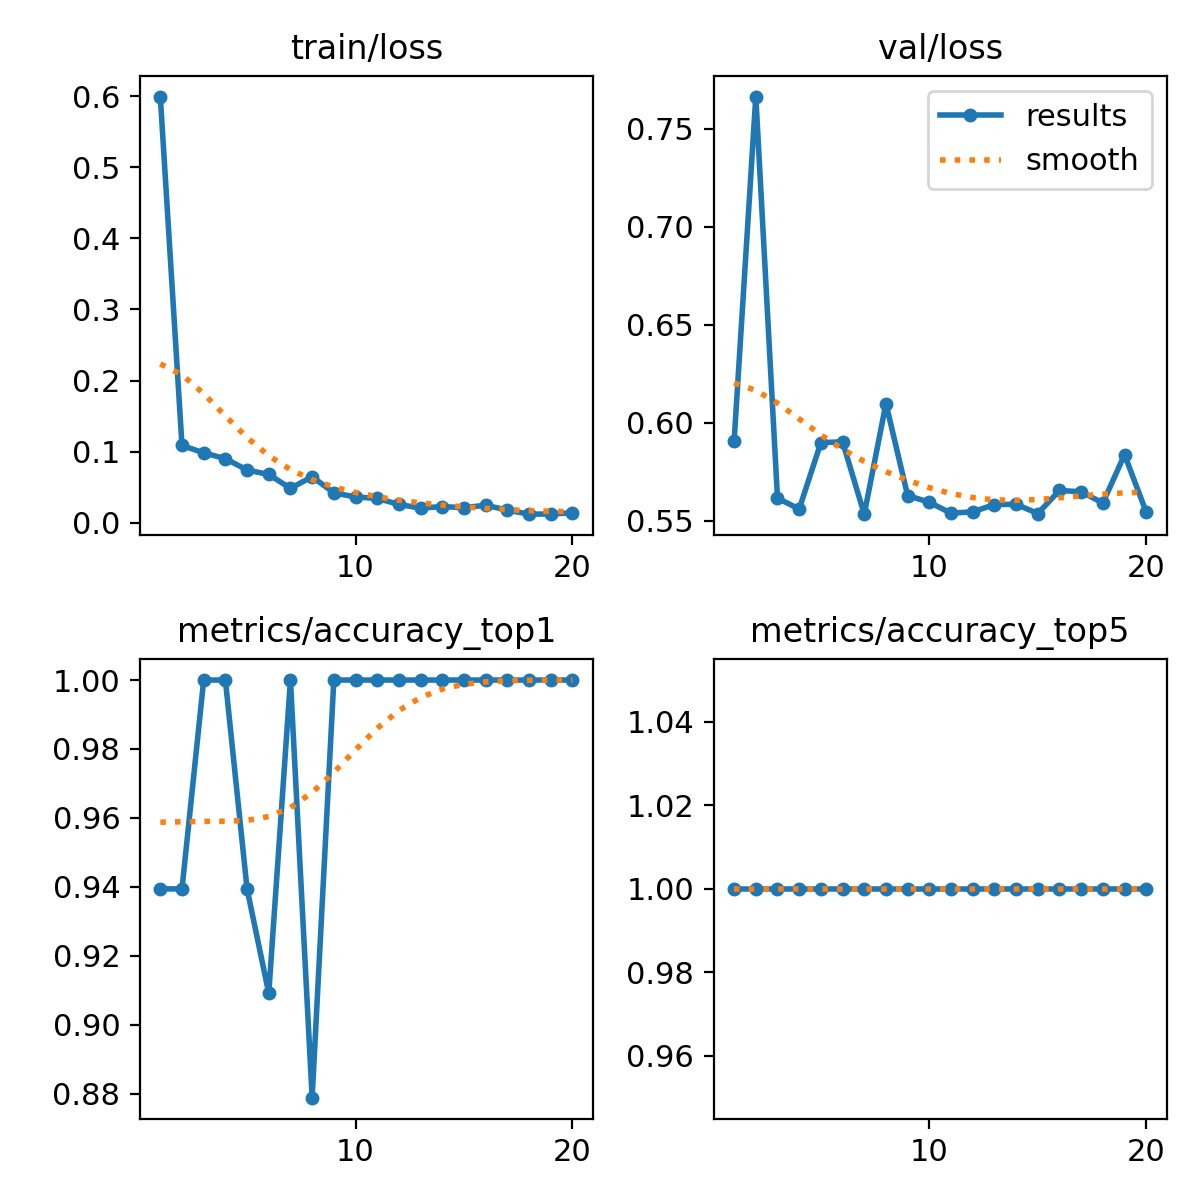

In [14]:
Image("runs\\classify\\train6\\results.png", width=600)

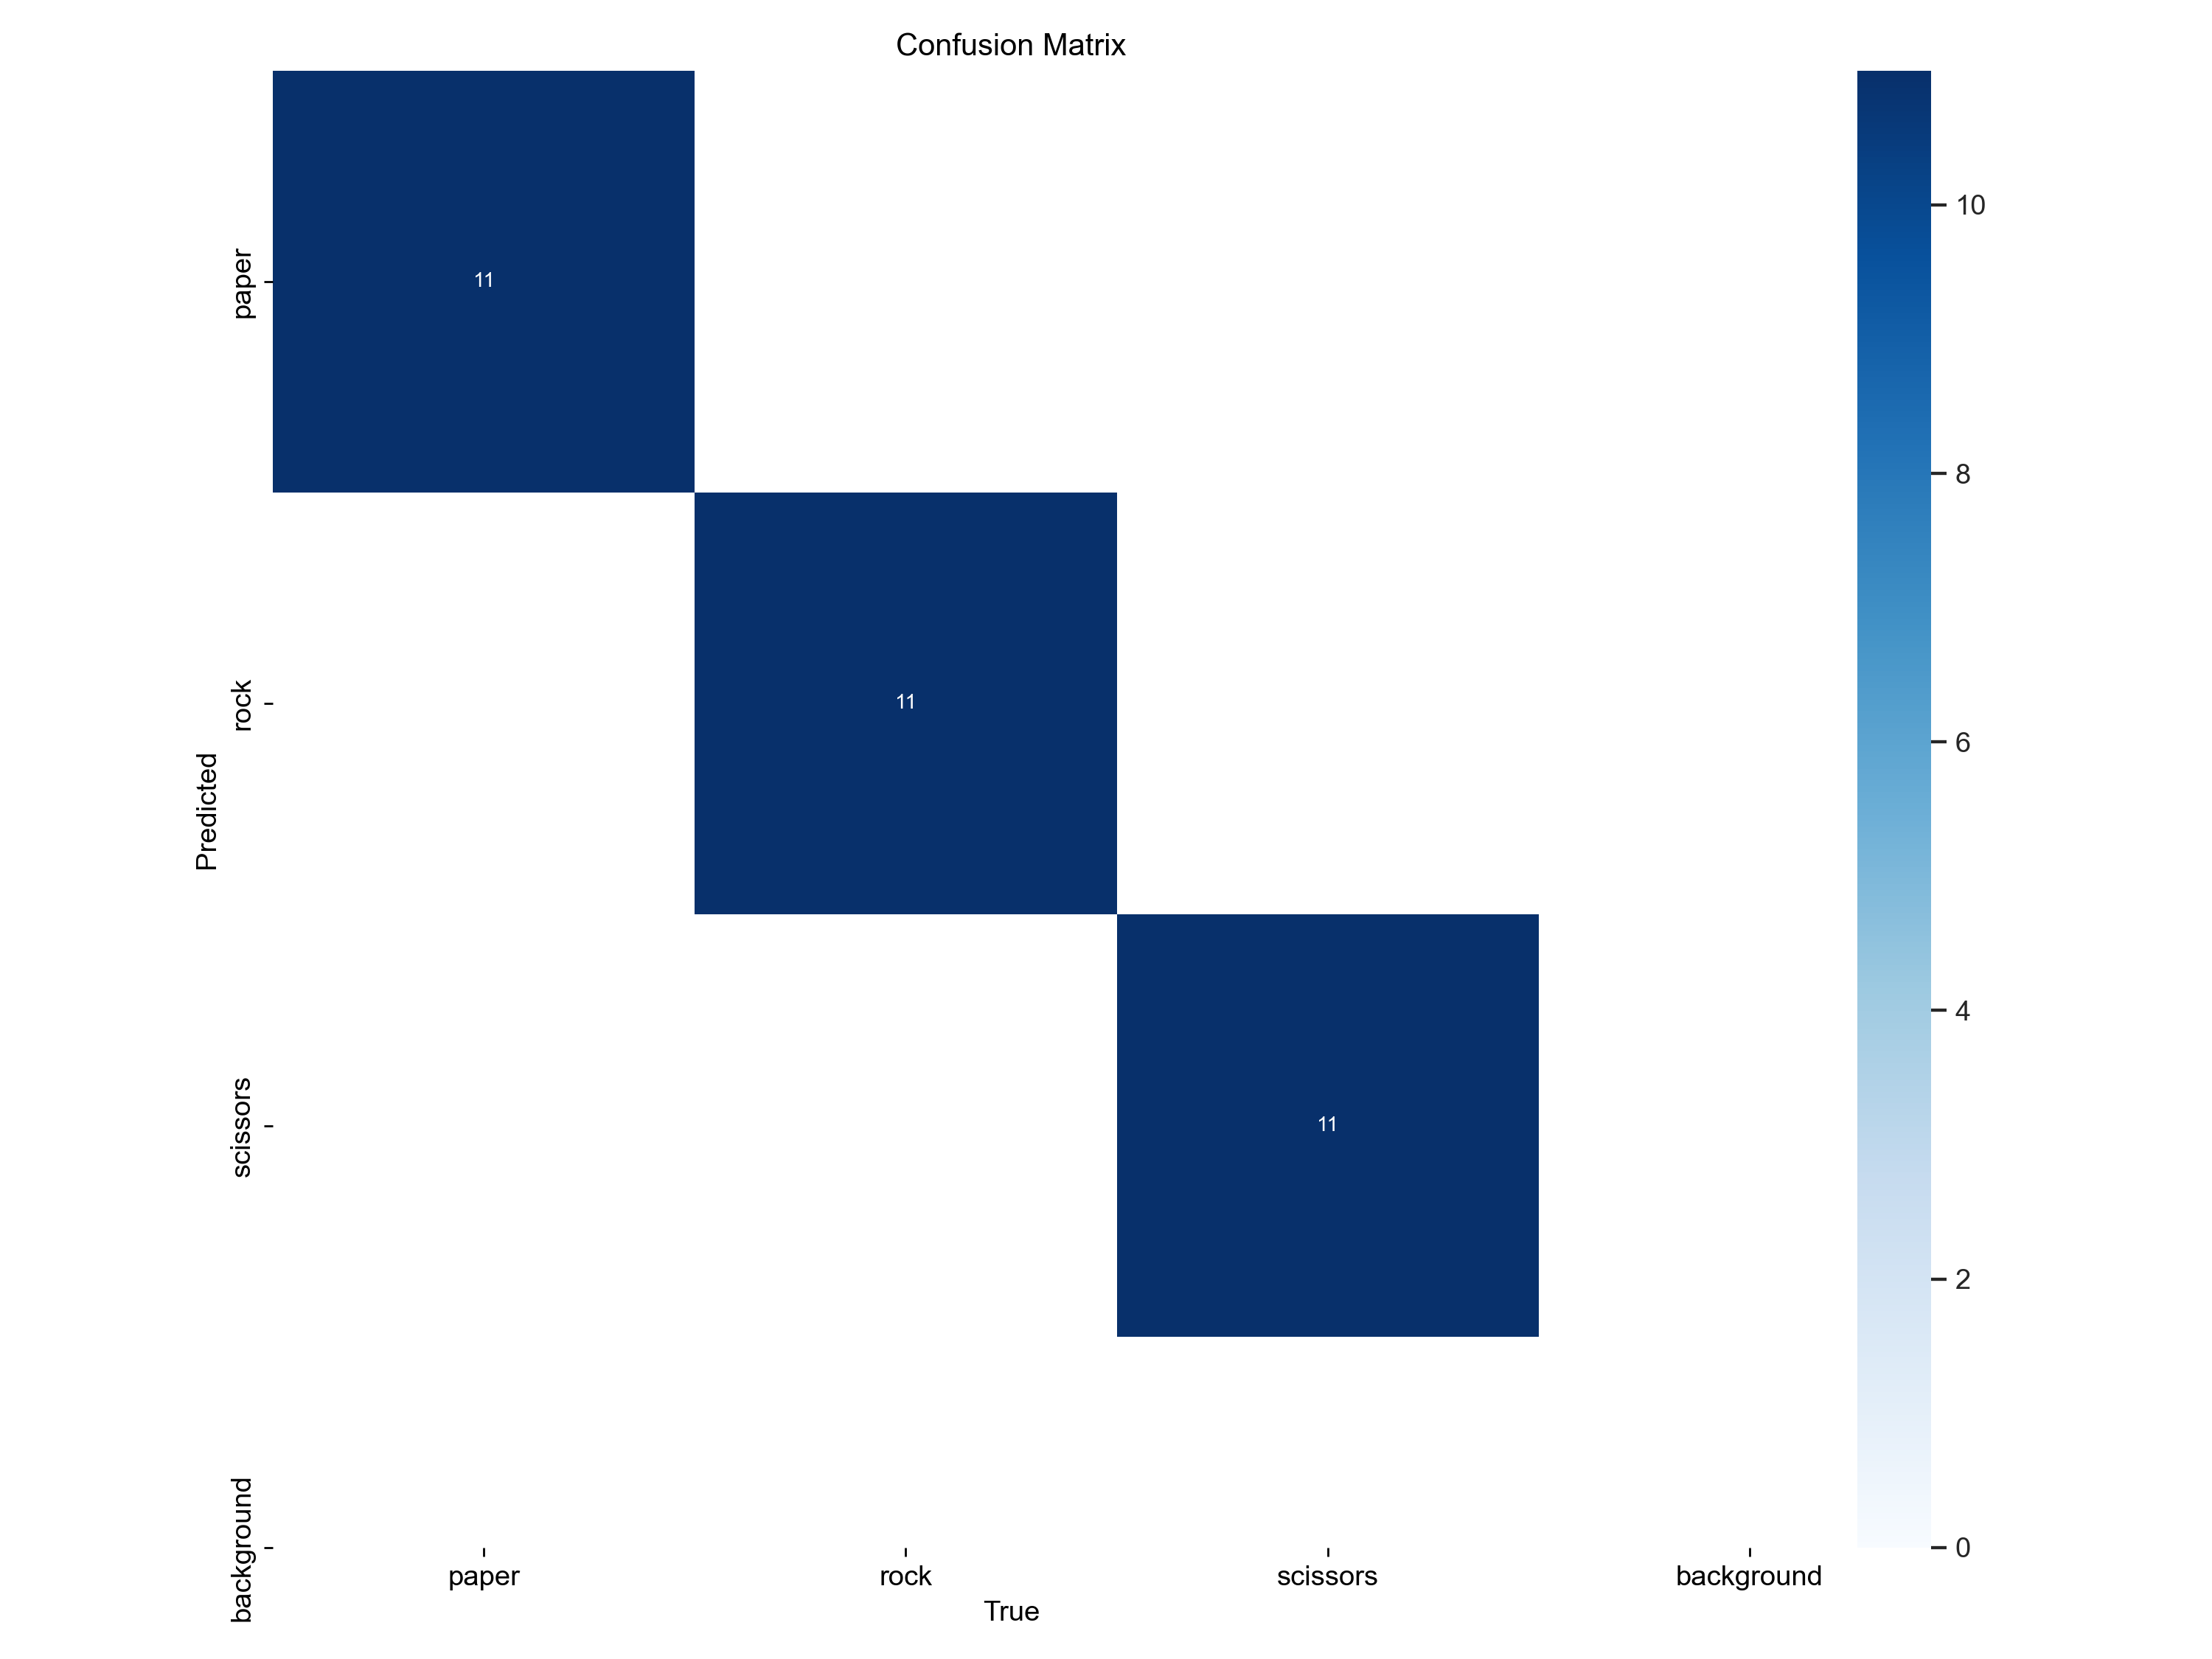

In [16]:
Image("runs\\classify\\train6\\confusion_matrix.png", width=600)

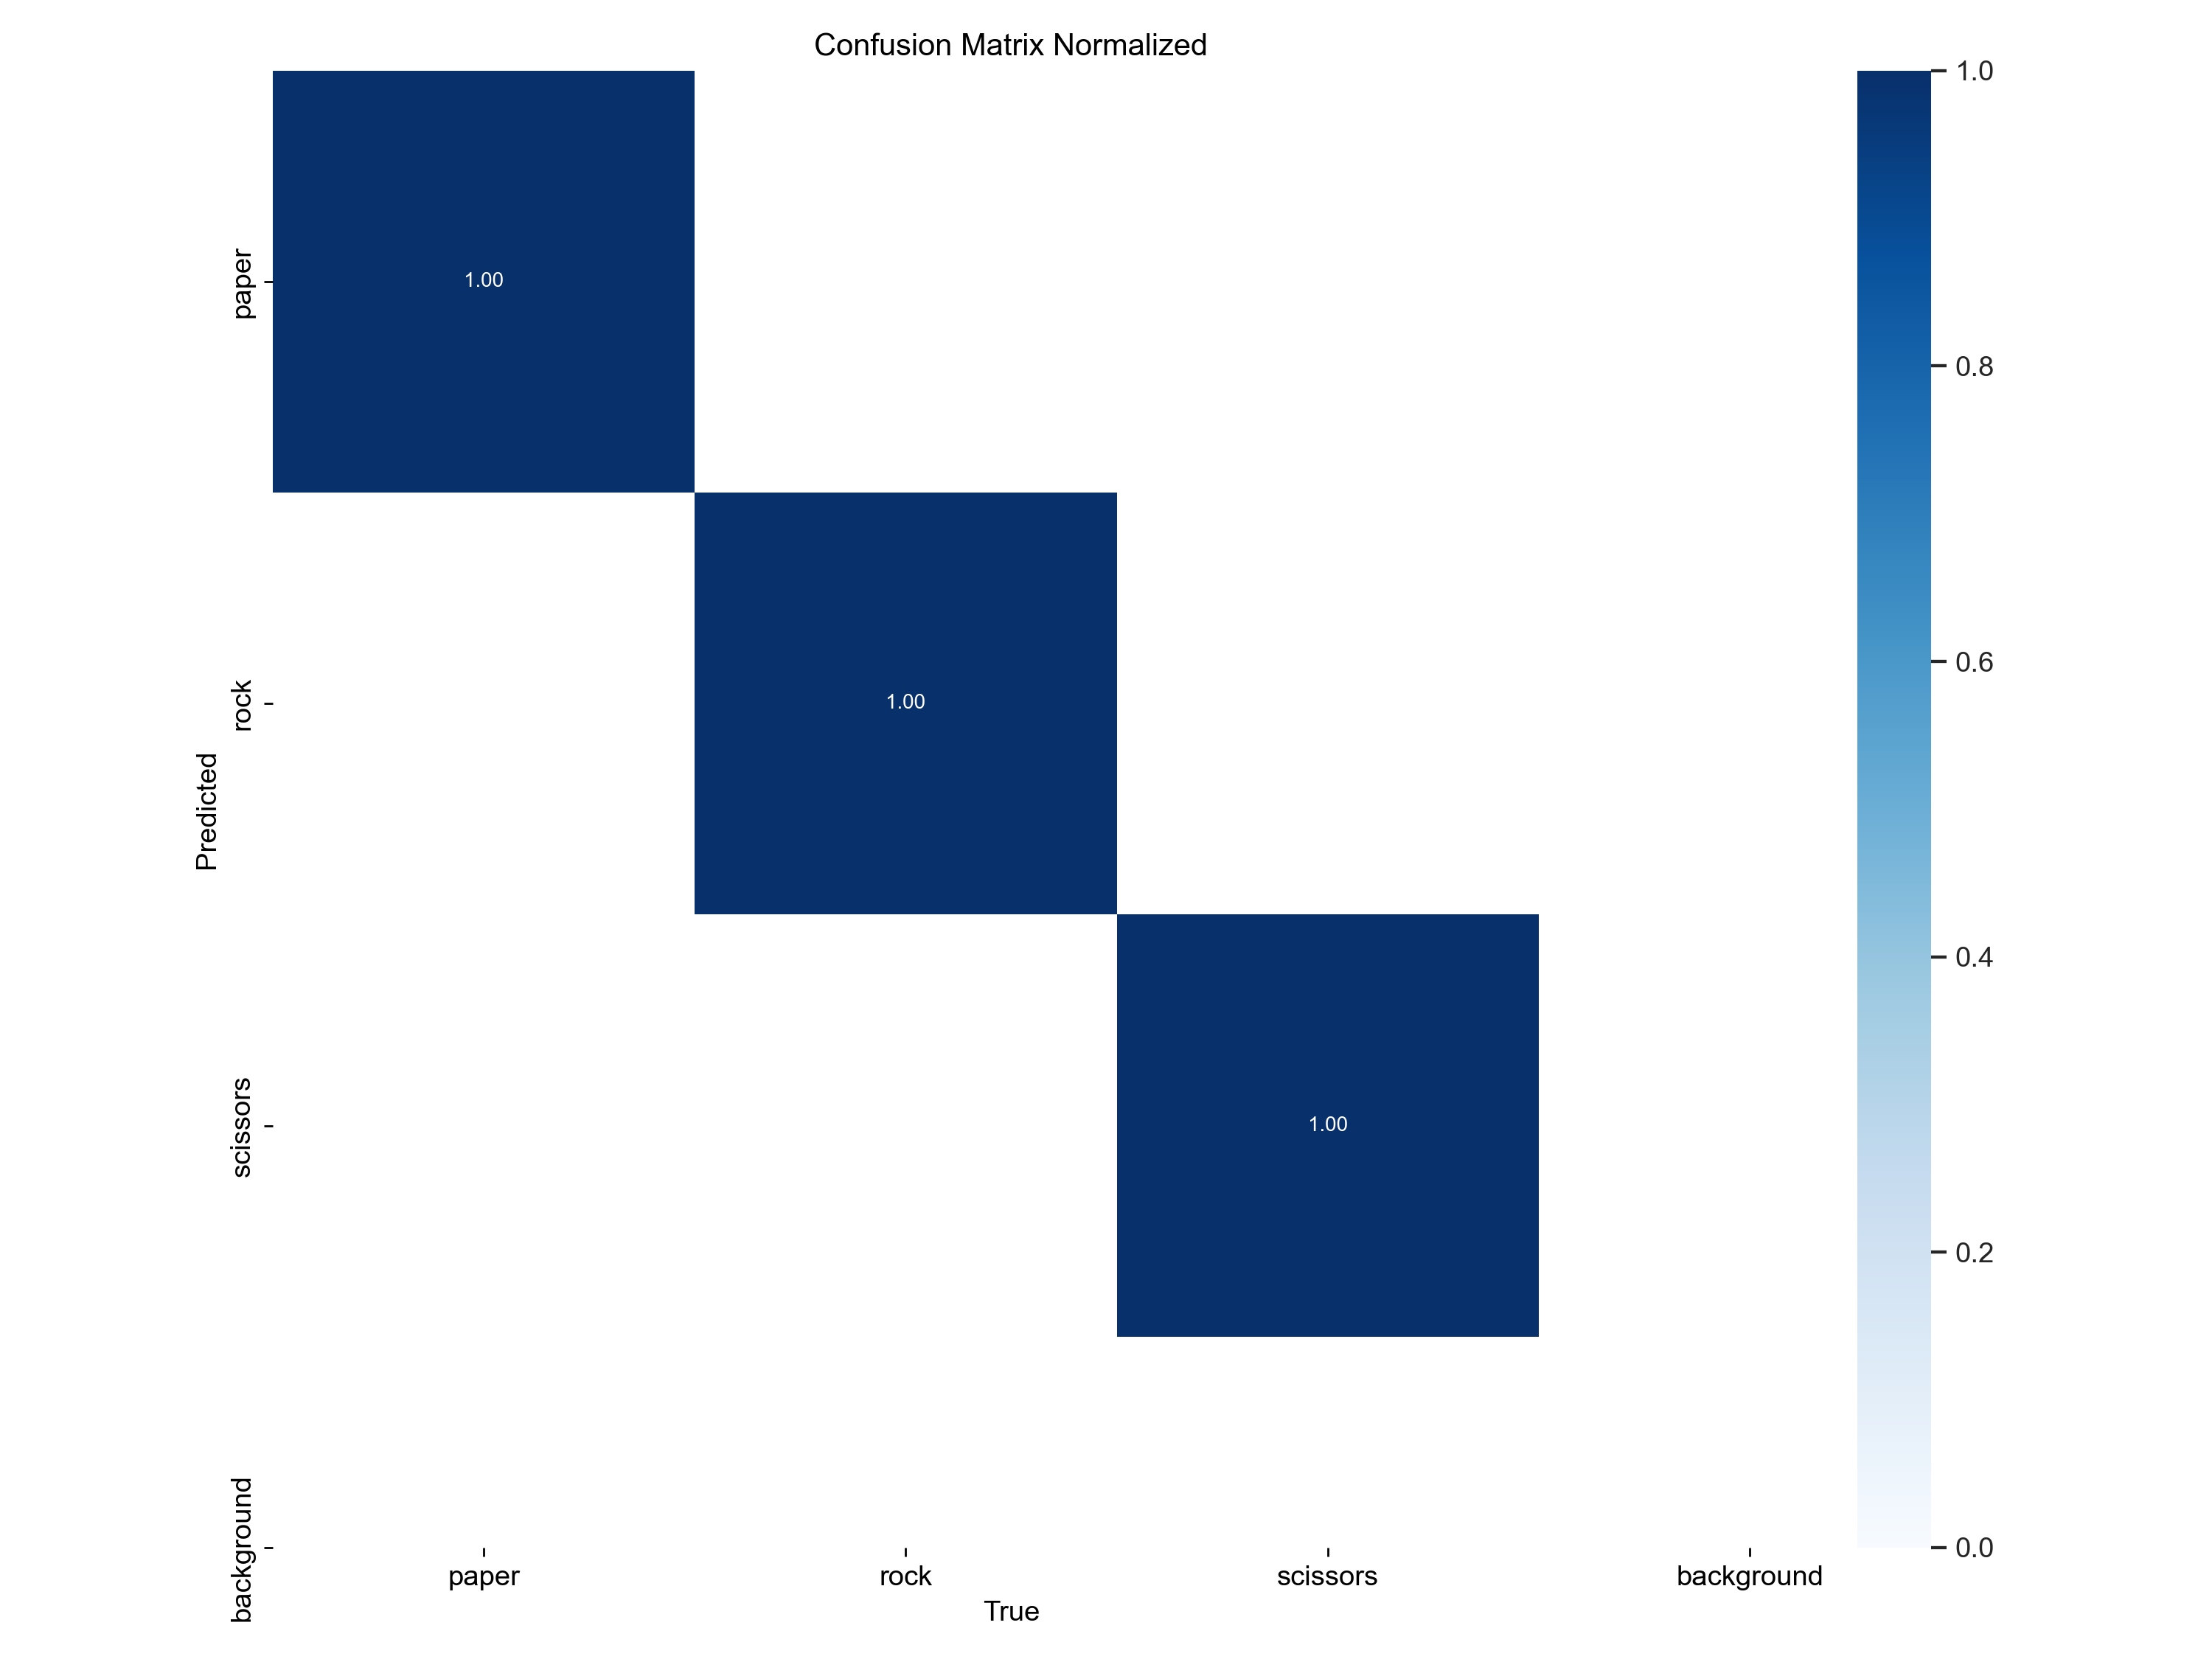

In [17]:
Image("runs\\classify\\train6\\confusion_matrix_normalized.png", width=600)

### Выводы

По графикам можно сделать вывод, что модель на базе YOLO v11 успешно обучилась на датасете "Rock-Paper-Scissors-1". С кувеличем номера эпохи падало значение ошибки как на тренировочном, так и на валидационном датсете. Как результат модель показала высокие метрики на тестовой выброке